In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.9/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   37.9/112.6 GB
CPU                    Intel Xeon CPU @ 2.00GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-p

In [ ]:

## Set up dataset from Roboflow
%cd {HOME}

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="zgLuOTWv6fMePlMHhVOb")
project = rf.workspace("thanhfvux").project("football-players-detection-3bcx1")
version = project.version(1)
dataset = version.download("yolov8")



/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Players-Detection-1 in yolov8:: 100%|██████████| 1312/1312 [00:00<00:00, 7536.18it/s]


In [ ]:
## training model

!yolo task=detect mode=train model=yolov8s.pt \
    data={dataset.location}/data.yaml epochs=25 imgsz=800

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Football-Players-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

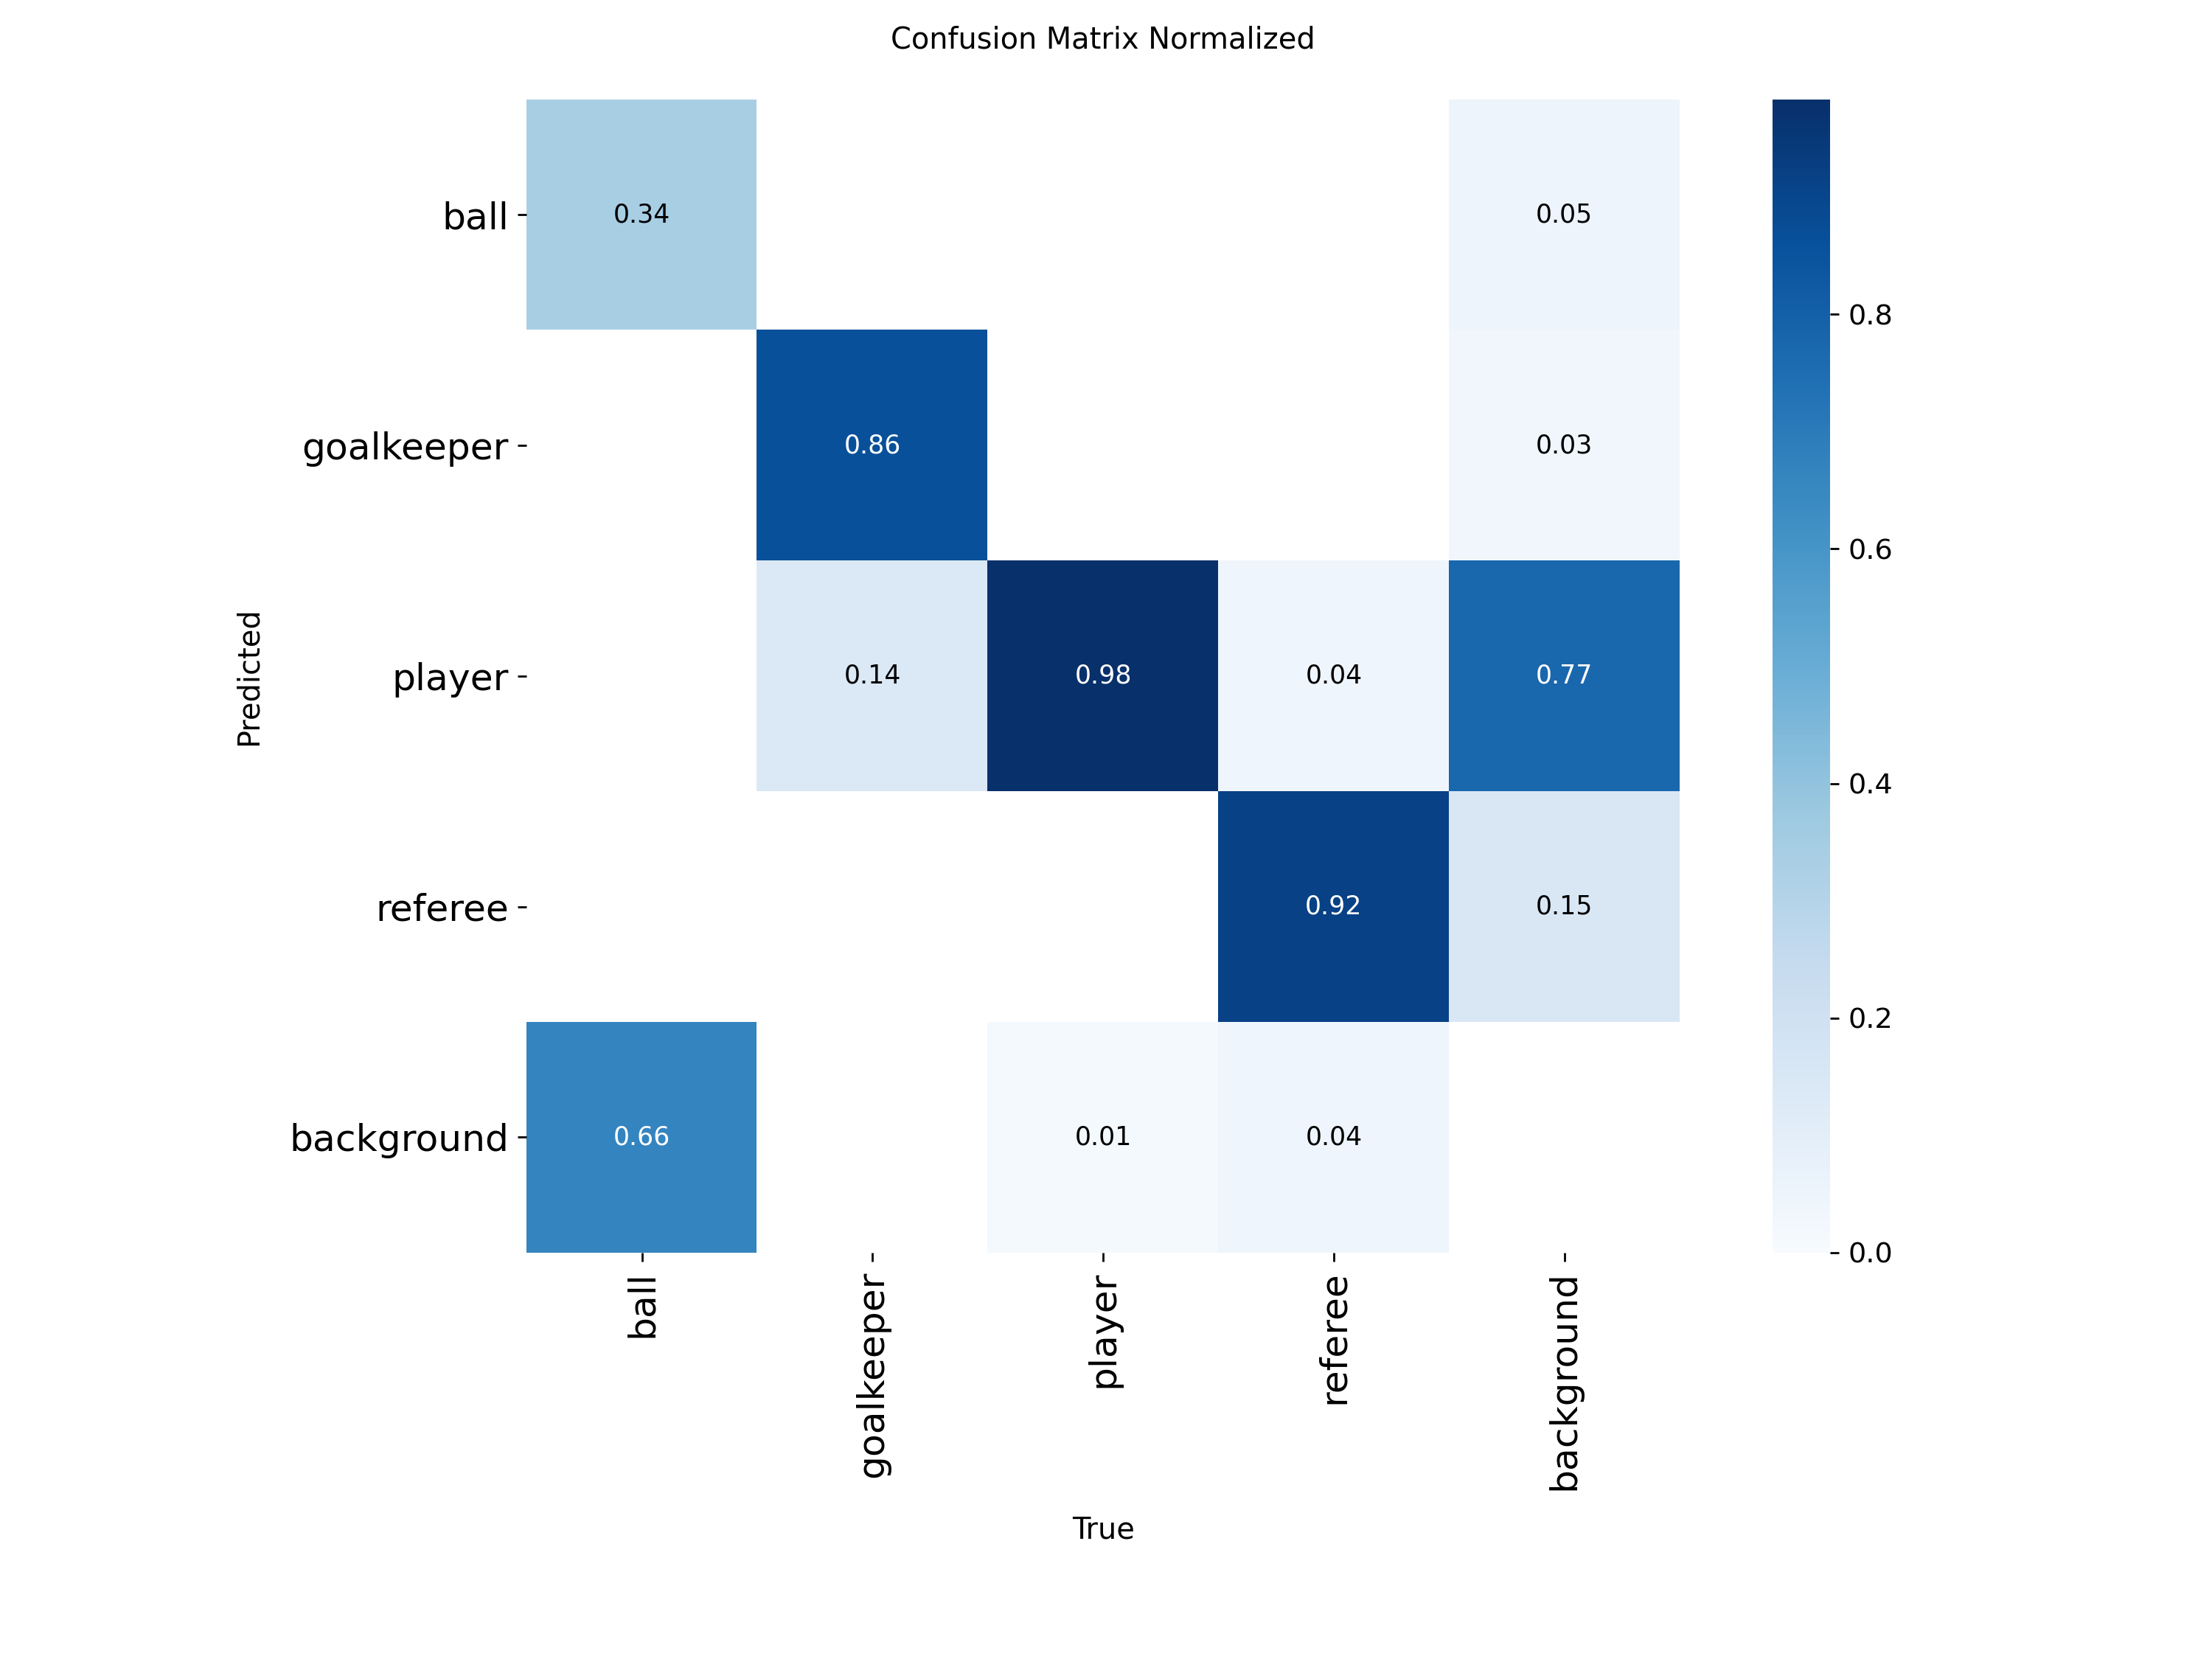

In [ ]:
## reviewing the finished model
# ???

from IPython.display import Image
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix_normalized.png", width=600)



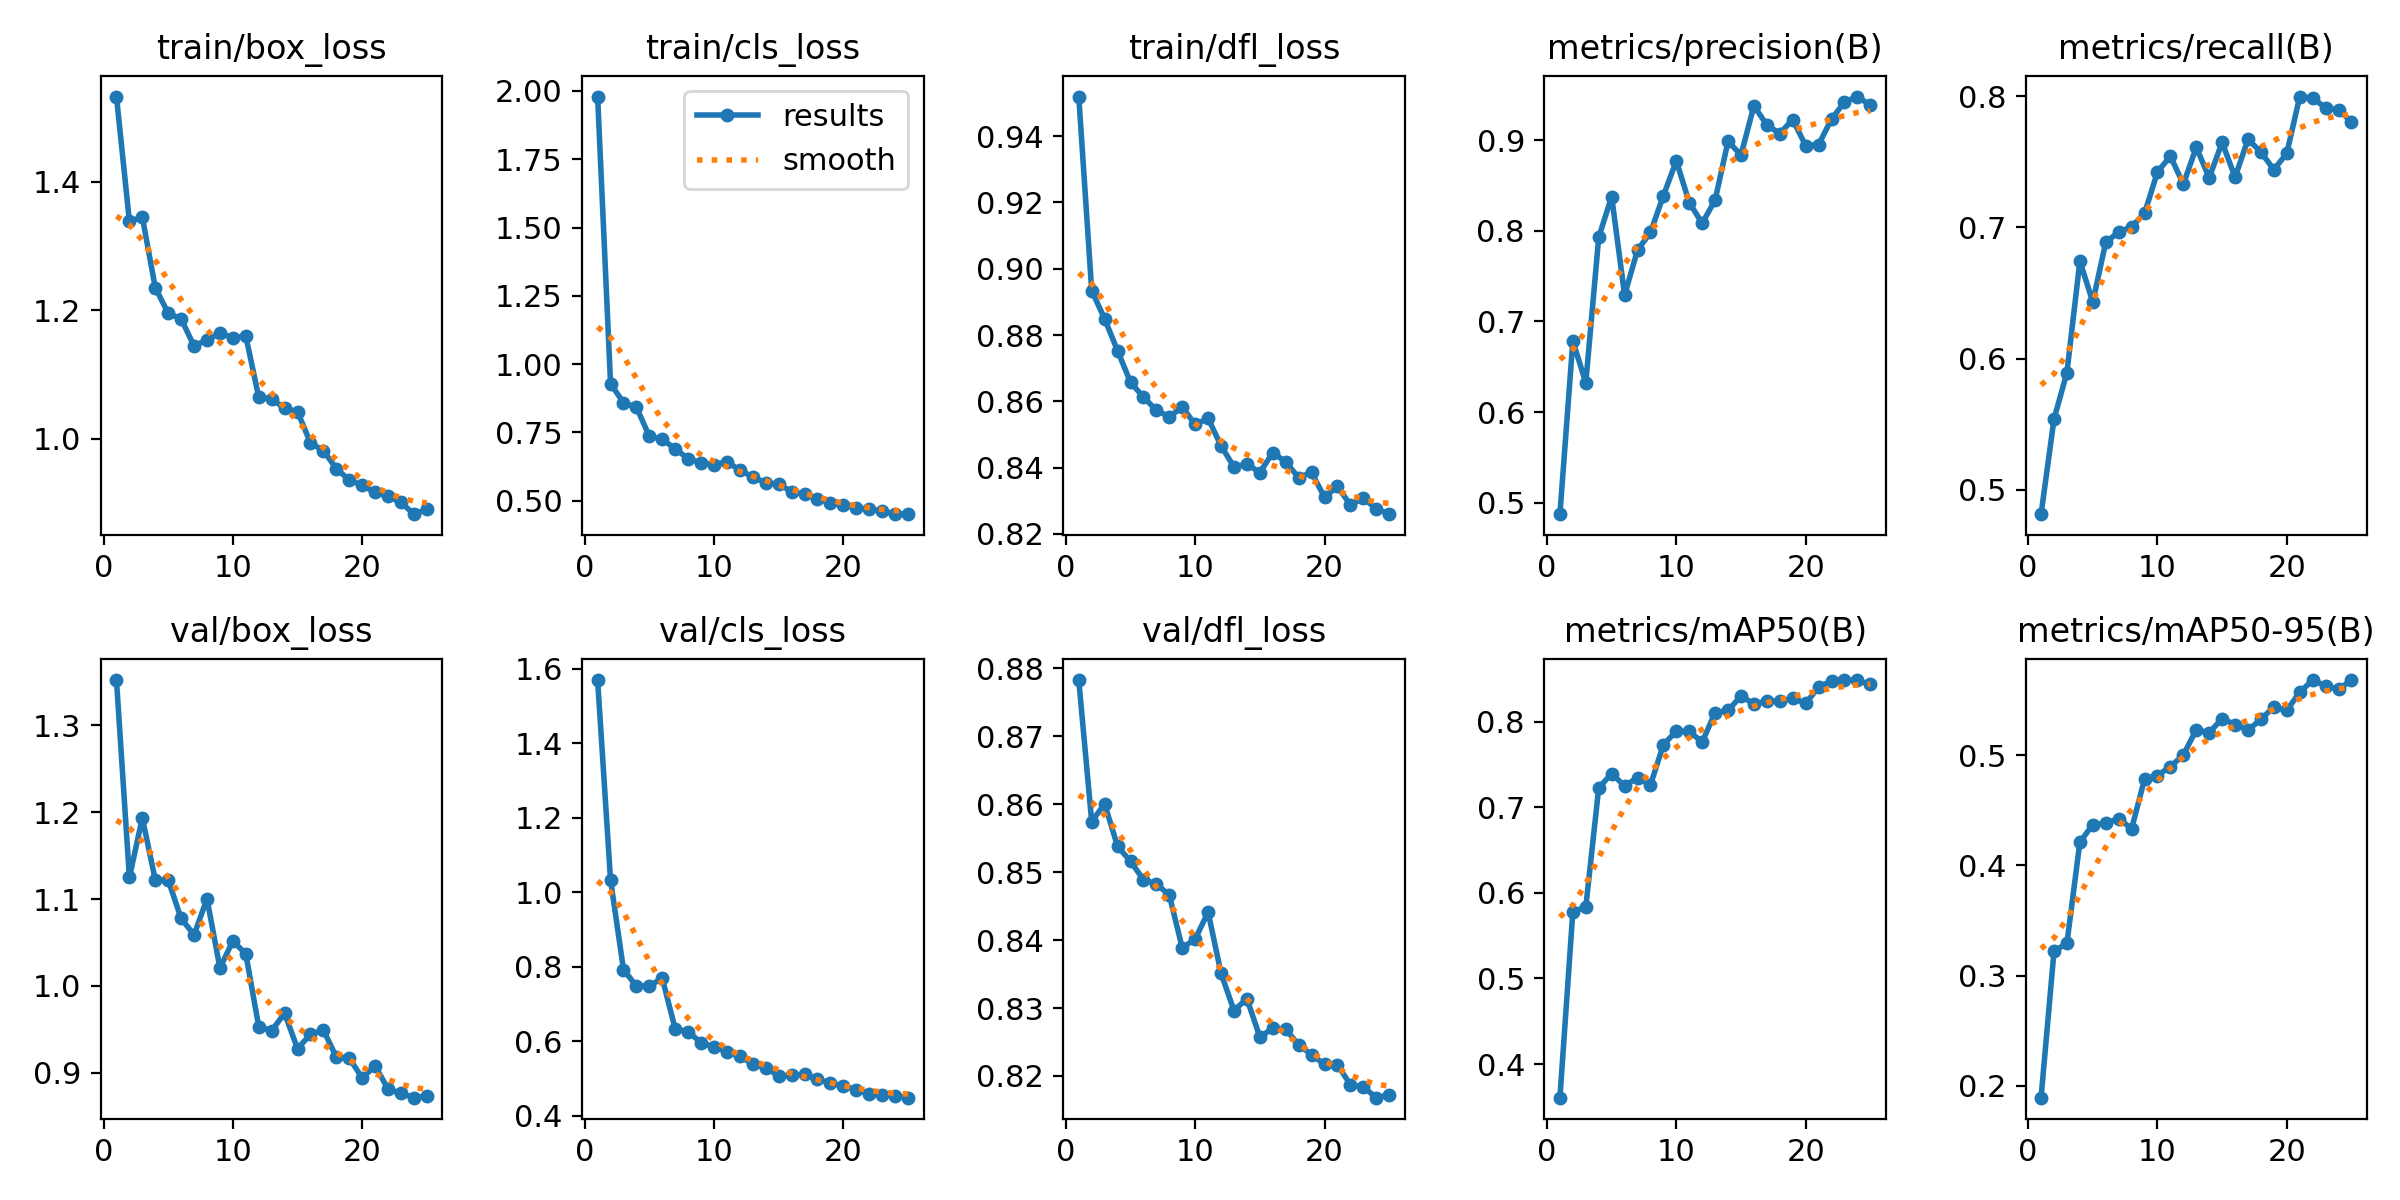

In [ ]:
##  Evaluation training progress
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

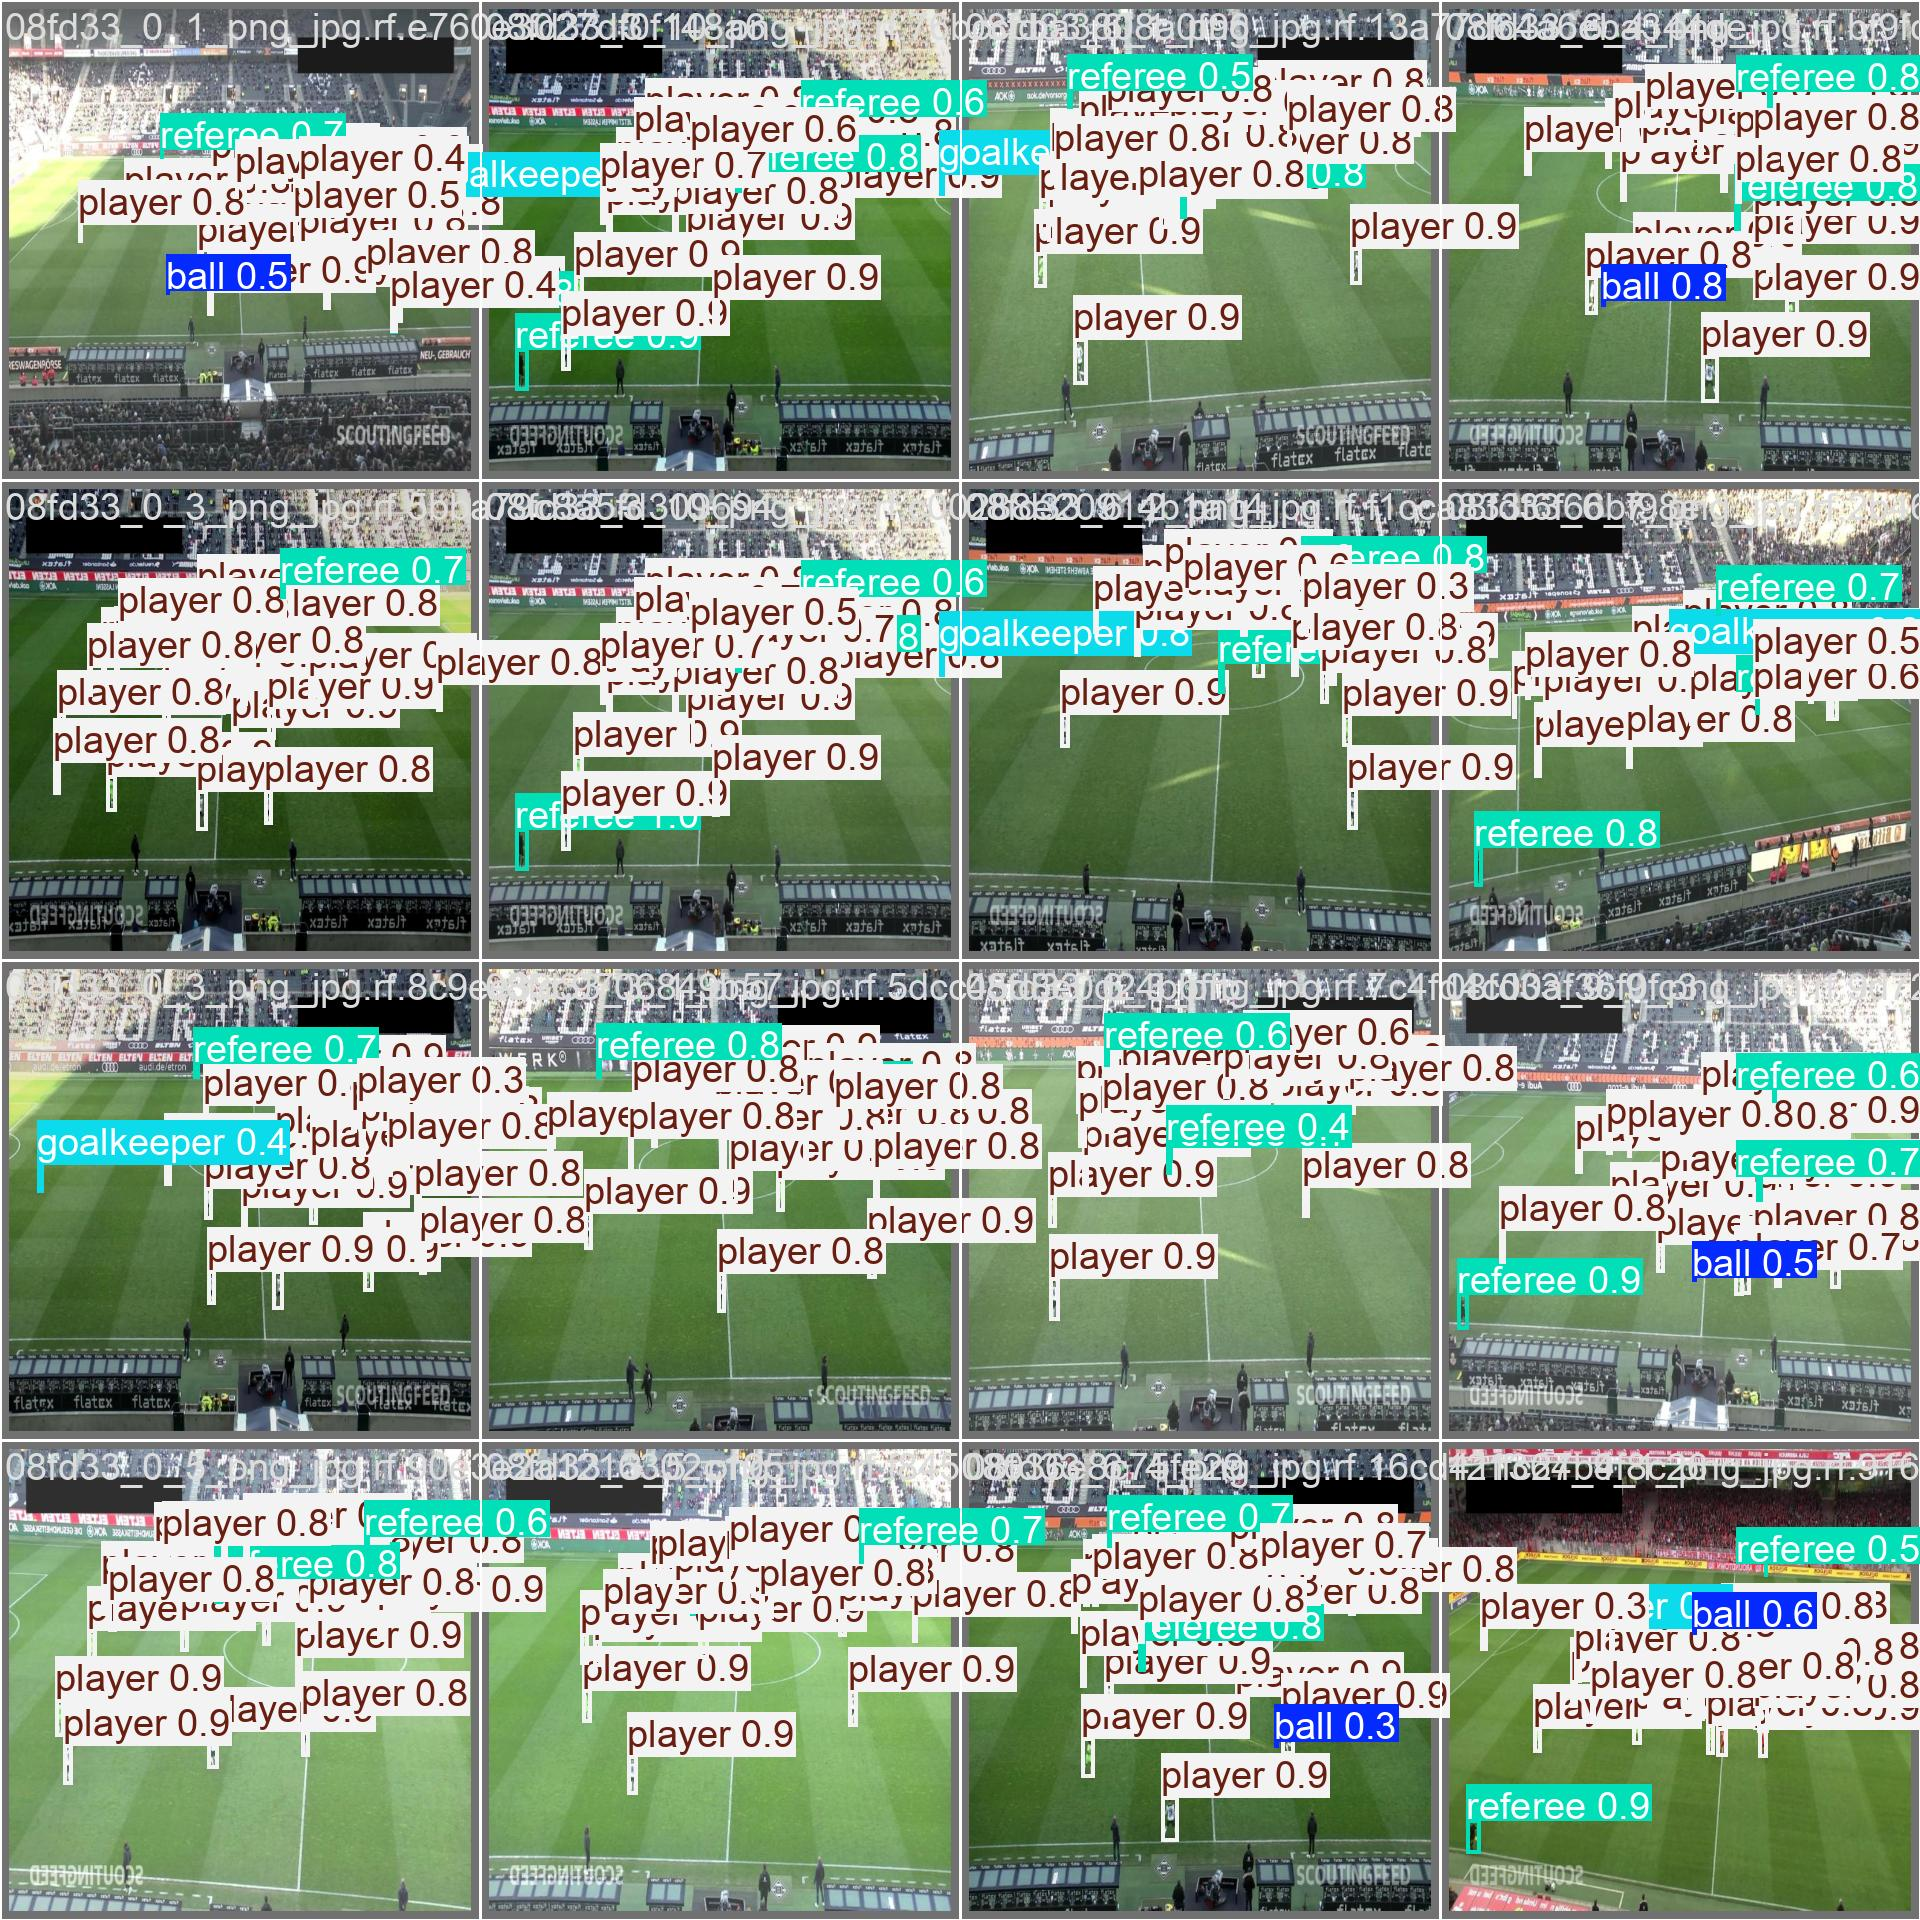

In [ ]:
## Results
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)